# Basic test
Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [4]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

In [14]:
from src.model.agents.Hive import Hive
from src.model.agents.Bee import BeeSwarm
from src.model.agents.Resource import Resource
from src.model.Model import ForagerModel
from src.model.config.config import *

In [6]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, expon

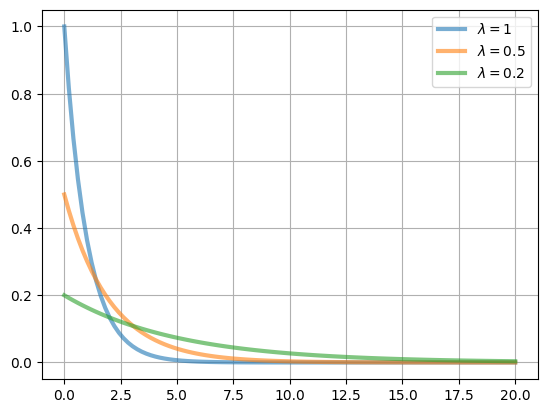

In [7]:
lambdas = [1, 0.5, 0.2]

for lam in lambdas:
    x = np.linspace(0, 20, 100)
    plt.plot(x, expon.pdf(x, scale=1/lam), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')

plt.legend()
plt.grid()
plt.show()

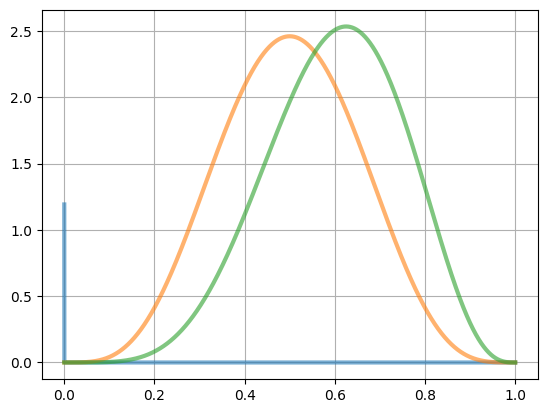

In [8]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.0, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * (mu + np.finfo(np.float32).eps)
    b = phi * (1 - mu - np.finfo(np.float32).eps)

    x = np.linspace(0, 1, 1000000)
    rvs = beta.rvs(a, b, size=1000)
    plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')

# plt.legend()
plt.grid()
plt.show()

In [9]:
beta.rvs(a, b)

0.5321950070295574

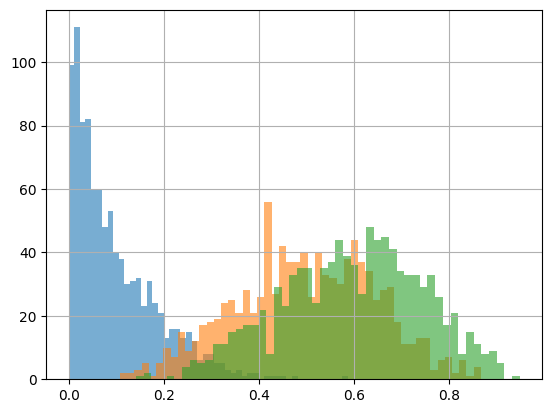

In [10]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.1, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * mu
    b = phi * (1 - mu)

    x = np.linspace(0, 1, 100)
    rvs = beta.rvs(a, b, size=1000)
    # plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')
    plt.hist(rvs, alpha=0.6, bins=50)

# plt.legend()
plt.grid()
plt.show()

## Instantiate model

In [15]:
# constant params adjusted
beeswarm_config = BeeSwarmConfig()
hive_config = HiveConfig()
resource_config = ResourceConfig()
model_config = ModelConfig()

model = ForagerModel(model_config, hive_config, beeswarm_config, resource_config, 100.0)

In [16]:
for _ in range(100):
    model.step()